In [0]:
!pip install -q keras

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import PIL
import tensorflow as tf
import numpy as np
import os


In [0]:
from tensorflow.python.keras.models import Model,Sequential
from tensorflow.python.keras.layers import Dense,Flatten,Dropout

In [0]:
from tensorflow.python.keras.applications import VGG16
from tensorflow.python.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.optimizers import Adam, RMSprop


#Path JOin

In [0]:
def path_join(dirname, filenames):
  return [os.path.join(dirname,fname) for fname in filenames]


##Helper-function for loading images

The data-set is not loaded into memory, instead it has a list of the files for the images in the training-set and another list of the files for the images in the test-set. This helper-function loads some image-files.


In [0]:
def load_images(image_paths):
  images=[plt.imread(img_path) for img_path in image_paths]
  
  return np.asarray(images)

In [1]:
!ls

datalab


In [16]:
!ls

datalab  Drive	My


#Connecting with Drive

In [0]:
# Install a Drive FUSE wrapper.
# https://github.com/astrada/google-drive-ocamlfuse
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse



# Generate auth tokens for Colab
from google.colab import auth
auth.authenticate_user()


# Generate creds for the Drive FUSE library.
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}


# Create a directory and mount Google Drive using that directory.
!mkdir -p My Drive
!google-drive-ocamlfuse My Drive


!ls My Drive/

# Create a file in Drive.
!echo "This newly created file will appear in your Drive file list." > My Drive/created.txt



#Resume

In [0]:
train_dir='Drive/IndIan_Food_DatasetM/train'
test_dir='Drive/IndIan_Food_DatasetM/test'
#!ls Drive/IndIan_Food_DatasetM/train/01_rasmalai/
#!ls Drive/IndIan_Food_DatasetM/test/

In [15]:
model=VGG16(include_top=True,weights='imagenet')

553467904/553467096 [==============================] - 16s 0us/step


In [16]:
#First we need to know the shape of the tensors expected as input by the pre-trained VGG16 model.
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
datagen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=180,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=[0.9, 1.5],
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='nearest')

In [0]:
datagen_test= ImageDataGenerator(rescale=1./255)

In [0]:
batch_size=20

In [0]:
if True:
  save_to_dir=None
else:
  save_to_dir='augumented_img/'

In [21]:
input_shape = model.layers[0].output_shape[1:3]
input_shape

(224, 224)

In [22]:
generator_train = datagen_train.flow_from_directory(directory=train_dir,
                                                    target_size=input_shape,
                                                    batch_size=batch_size,
                                                    shuffle=True,
                                                    save_to_dir=save_to_dir)

Found 3242 images belonging to 6 classes.


In [23]:

generator_test = datagen_test.flow_from_directory(directory=test_dir,
                                                  target_size=input_shape,
                                                  batch_size=batch_size,
                                                  shuffle=False)

Found 733 images belonging to 6 classes.


In [84]:
folder

'06_dosa'

In [0]:
import os
path = '/content/Drive/IndIan_Food_DatasetM/test/05_jalebi/'
files = os.listdir(path)
i = 1

for file in files:
    print(os.path.join(path, file),"to")
    
    print(os.path.join(path, str(i)+'.jpeg'))
    os.rename(os.path.join(path, file), os.path.join(path, str(i)+'.jpeg'))
    i = i+1

###Test Data Rename(Ignore)

In [0]:
import os
parent = '/content/Drive/IndIan_Food_DatasetM/test/'
for folder in os.listdir(parent):
  path= os.path.join(parent,folder)
  files = os.listdir(path)
  print (files)
  i = 1
  for file in files:
    print(os.path.join(path, file),"to")
    
    print(os.path.join(path, str(file)+'.jpeg'))
    os.rename(os.path.join(path, file), os.path.join(path, str(file)+'.jpeg'))
    i = i+1
   
  

###Train Dta Rename(Ignore)

In [0]:
import os
parent = '/content/Drive/IndIan_Food_DatasetM/train/'
for folder in os.listdir(parent):
  path= os.path.join(parent,folder)
  files = os.listdir(path)
  print (files)
  i = 1
  for file in files:
    print(os.path.join(path, file),"to")
    
    print(os.path.join(path, str(file)+'.jpeg'))
    os.rename(os.path.join(path, file), os.path.join(path, str(file)+'.jpeg'))
    i = i+1

##zxc

In [24]:
steps_test = generator_test.n / batch_size
steps_test

36.65

In [25]:
generator_train.filenames[0]

'01_rasmalai/1.jpeg'

In [0]:
#Creating Paths
image_paths_train = path_join(train_dir, generator_train.filenames)
image_paths_test = path_join(test_dir, generator_test.filenames)

In [0]:
#Class Numbers
cls_train=generator_train.classes
cls_test=generator_train.classes

In [0]:
#CLass NAames
class_names=list(generator_train.class_indices.keys())

In [29]:
class_names

['01_rasmalai',
 '02_poha',
 '03_chole_bhature',
 '04_gulab_jamun',
 '05_jalebi',
 '06_dosa']

In [0]:
def plot_images(images, cls_true, cls_pred=None, smooth=True):

    assert len(images) == len(cls_true)

    # Create figure with sub-plots.
    fig, axes = plt.subplots(3, 3)

    # Adjust vertical spacing.
    if cls_pred is None:
        hspace = 0.3
    else:
        hspace = 0.6
    fig.subplots_adjust(hspace=hspace, wspace=0.3)

    # Interpolation type.
    if smooth:
        interpolation = 'spline16'
    else:
        interpolation = 'nearest'

    for i, ax in enumerate(axes.flat):
        # There may be less than 9 images, ensure it doesn't crash.
        if i < len(images):
            # Plot image.
            ax.imshow(images[i],
                      interpolation=interpolation)

            # Name of the true class.
            cls_true_name = class_names[cls_true[i]]

            # Show true and predicted classes.
            if cls_pred is None:
                xlabel = "True: {0}".format(cls_true_name)
            else:
                # Name of the predicted class.
                cls_pred_name = class_names[cls_pred[i]]

                xlabel = "True: {0}\nPred: {1}".format(cls_true_name, cls_pred_name)

            # Show the classes as the label on the x-axis.
            ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [31]:
num_classes = generator_train.num_classes
num_classes

6

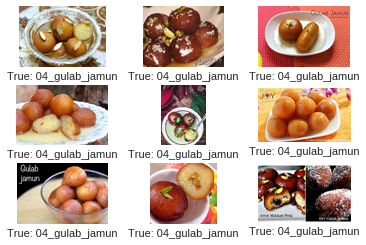

In [32]:
# Load the first images from the train-set.
images = load_images(image_paths=image_paths_train[1808:1817])

# Get the true classes for those images.
cls_true = cls_train[1808:1817]

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true, smooth=True)

In [0]:
from sklearn.utils.class_weight import compute_class_weight

In [0]:
from sklearn.utils.class_weight import compute_class_weight
class_weight=compute_class_weight(class_weight='balanced',classes=np.unique(cls_train),y=cls_train)

In [35]:
from sklearn.utils.class_weight import compute_class_weight
class_weight=compute_class_weight(class_weight='balanced',classes=np.unique(cls_train),y=cls_train)
class_weight

array([1.04715762, 1.01949686, 1.05533854, 1.00247372, 1.02724968,
       0.8729133 ])

In [36]:
class_names

['01_rasmalai',
 '02_poha',
 '03_chole_bhature',
 '04_gulab_jamun',
 '05_jalebi',
 '06_dosa']

#Predict Function

In [0]:
def predict(image_path):

    img = PIL.Image.open(image_path)
    img_resized = img.resize(input_shape, PIL.Image.LANCZOS)

    
    plt.imshow(img_resized)
    plt.show()

    # Convert the PIL image to a numpy-array with the proper shape.
    img_array = np.expand_dims(np.array(img_resized), axis=0)

    pred = model.predict(img_array)
    
    
    pred_decoded = decode_predictions(pred)[0]

    # Print the predictions.
    for code, name, score in pred_decoded:
        print("{0:>6.2%} : {1}".format(score, name))

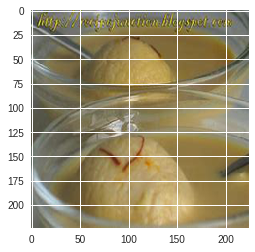

40960/35363 [==================================] - 0s 3us/step
62.87% : beaker
22.11% : Petri_dish
14.33% : measuring_cup
 0.15% : candle
 0.15% : mixing_bowl


In [38]:
predict(image_path=image_paths_train[0])

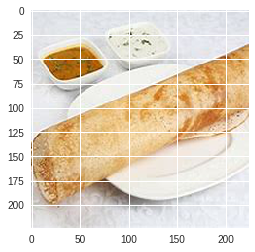

14.04% : bathtub
11.27% : remote_control
 9.76% : toilet_seat
 7.37% : can_opener
 7.12% : tub


In [63]:
predict(image_path=image_paths_train[3000])

### The pre-trained VGG16 model was unable to classify images from our dataset. The reason is that the VGG16 model was trained on the ImageNet dataset which may not have contained many images of IndIan Food Items.

In [0]:
transfer_layer = model.get_layer('block5_pool')

In [64]:
transfer_layer.output

<tf.Tensor 'block5_pool_1/MaxPool:0' shape=(?, 7, 7, 512) dtype=float32>

In [0]:
conv_model=Model(inputs=model.input,outputs=transfer_layer.output)

In [0]:
new_model= Sequential()

In [0]:
new_model.add(conv_model)

new_model.add(Flatten())

new_model.add(Dense(1024,activation='relu'))

new_model.add(Dropout(0.5))

new_model.add(Dense(num_classes,activation='softmax'))

In [0]:
optimizer = Adam(lr=1e-5)

In [0]:
loss = 'categorical_crossentropy'

In [0]:
metrics = ['categorical_accuracy']

## Freezing the Trainable Conv_layer

In [0]:
def print_layer_trainable():
    for layer in conv_model.layers:
        print("{0}:\t{1}".format(layer.trainable, layer.name))

In [50]:
print_layer_trainable()

True:	input_2
True:	block1_conv1
True:	block1_conv2
True:	block1_pool
True:	block2_conv1
True:	block2_conv2
True:	block2_pool
True:	block3_conv1
True:	block3_conv2
True:	block3_conv3
True:	block3_pool
True:	block4_conv1
True:	block4_conv2
True:	block4_conv3
True:	block4_pool
True:	block5_conv1
True:	block5_conv2
True:	block5_conv3
True:	block5_pool


In [0]:
conv_model.trainable = False

In [0]:

for layer in conv_model.layers:
    layer.trainable = False

In [53]:
print_layer_trainable()

False:	input_2
False:	block1_conv1
False:	block1_conv2
False:	block1_pool
False:	block2_conv1
False:	block2_conv2
False:	block2_pool
False:	block3_conv1
False:	block3_conv2
False:	block3_conv3
False:	block3_pool
False:	block4_conv1
False:	block4_conv2
False:	block4_conv3
False:	block4_pool
False:	block5_conv1
False:	block5_conv2
False:	block5_conv3
False:	block5_pool


In [0]:
new_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [0]:
epochs = 20
steps_per_epoch = 100

In [84]:

history = new_model.fit_generator(generator=generator_train,
                                  epochs=epochs,
                                  steps_per_epoch=steps_per_epoch,
                                  class_weight=class_weight,
                                  validation_data=generator_test,
                                  validation_steps=steps_test)
tic=time.time()


Epoch 1/20
100/100 [==============================] - 1896s 19s/step - loss: 1.8007 - categorical_accuracy: 0.2860 - val_loss: 1.1575 - val_categorical_accuracy: 0.6589
Epoch 2/20
100/100 [==============================] - 823s 8s/step - loss: 1.4061 - categorical_accuracy: 0.4585 - val_loss: 0.8887 - val_categorical_accuracy: 0.7517
Epoch 3/20
100/100 [==============================] - 52s 521ms/step - loss: 1.1819 - categorical_accuracy: 0.5631 - val_loss: 0.7571 - val_categorical_accuracy: 0.7954
Epoch 4/20
 25/100 [======>.......................] - ETA: 22s - loss: 1.0586 - categorical_accuracy: 0.6060

100/100 [==============================] - 52s 522ms/step - loss: 1.0490 - categorical_accuracy: 0.6140 - val_loss: 0.6618 - val_categorical_accuracy: 0.8022
Epoch 5/20
100/100 [==============================] - 54s 543ms/step - loss: 1.0480 - categorical_accuracy: 0.6325 - val_loss: 0.6016 - val_categorical_accuracy: 0.8458
Epoch 6/20
100/100 [==============================] - 52s 525ms/step - loss: 0.9605 - categorical_accuracy: 0.6460 - val_loss: 0.5506 - val_categorical_accuracy: 0.8486
Epoch 7/20
 35/100 [=========>....................] - ETA: 21s - loss: 1.0235 - categorical_accuracy: 0.6357

100/100 [==============================] - 52s 523ms/step - loss: 0.9631 - categorical_accuracy: 0.6576 - val_loss: 0.5382 - val_categorical_accuracy: 0.8458
Epoch 8/20
100/100 [==============================] - 51s 512ms/step - loss: 0.9119 - categorical_accuracy: 0.6750 - val_loss: 0.5076 - val_categorical_accuracy: 0.8527
Epoch 9/20
100/100 [==============================] - 53s 534ms/step - loss: 0.8746 - categorical_accuracy: 0.6755 - val_loss: 0.4729 - val_categorical_accuracy: 0.8786
Epoch 10/20
 36/100 [=========>....................] - ETA: 23s - loss: 0.8148 - categorical_accuracy: 0.7014

100/100 [==============================] - 53s 525ms/step - loss: 0.8356 - categorical_accuracy: 0.7020 - val_loss: 0.4532 - val_categorical_accuracy: 0.8772
Epoch 11/20
100/100 [==============================] - 53s 528ms/step - loss: 0.8313 - categorical_accuracy: 0.6960 - val_loss: 0.4280 - val_categorical_accuracy: 0.8881
Epoch 12/20
100/100 [==============================] - 52s 521ms/step - loss: 0.7738 - categorical_accuracy: 0.7140 - val_loss: 0.4178 - val_categorical_accuracy: 0.8745
Epoch 13/20
 36/100 [=========>....................] - ETA: 22s - loss: 0.8288 - categorical_accuracy: 0.7069

100/100 [==============================] - 55s 545ms/step - loss: 0.8060 - categorical_accuracy: 0.7175 - val_loss: 0.4125 - val_categorical_accuracy: 0.8868
Epoch 14/20
100/100 [==============================] - 55s 552ms/step - loss: 0.7639 - categorical_accuracy: 0.7300 - val_loss: 0.3842 - val_categorical_accuracy: 0.9059
Epoch 15/20
100/100 [==============================] - 52s 520ms/step - loss: 0.7567 - categorical_accuracy: 0.7500 - val_loss: 0.3821 - val_categorical_accuracy: 0.9004
Epoch 16/20
 36/100 [=========>....................] - ETA: 22s - loss: 0.7309 - categorical_accuracy: 0.7528

100/100 [==============================] - 52s 520ms/step - loss: 0.7448 - categorical_accuracy: 0.7365 - val_loss: 0.3744 - val_categorical_accuracy: 0.9018
Epoch 17/20
100/100 [==============================] - 53s 530ms/step - loss: 0.6989 - categorical_accuracy: 0.7670 - val_loss: 0.3575 - val_categorical_accuracy: 0.9059
Epoch 18/20
100/100 [==============================] - 52s 520ms/step - loss: 0.7177 - categorical_accuracy: 0.7435 - val_loss: 0.3504 - val_categorical_accuracy: 0.9004
Epoch 19/20
 36/100 [=========>....................] - ETA: 22s - loss: 0.7245 - categorical_accuracy: 0.7569

100/100 [==============================] - 52s 524ms/step - loss: 0.7266 - categorical_accuracy: 0.7485 - val_loss: 0.3474 - val_categorical_accuracy: 0.9059
Epoch 20/20
100/100 [==============================] - 51s 514ms/step - loss: 0.6577 - categorical_accuracy: 0.7765 - val_loss: 0.3614 - val_categorical_accuracy: 0.8772


#Training HIstory

In [0]:
def plot_training_history(history):
    # Get the classification accuracy and loss-value
    # for the training-set.
    acc = history.history['categorical_accuracy']
    loss = history.history['loss']

    # Get it for the validation-set (we only use the test-set).
    val_acc = history.history['val_categorical_accuracy']
    val_loss = history.history['val_loss']

    # Plot the accuracy and loss-values for the training-set.
    plt.plot(acc, linestyle='-', color='b', label='Training Acc.')
    plt.plot(loss, 'o', color='b', label='Training Loss')
    
    # Plot it for the test-set.
    plt.plot(val_acc, linestyle='--', color='r', label='Test Acc.')
    plt.plot(val_loss, 'o', color='r', label='Test Loss')

    # Plot title and legend.
    plt.title('Training and Test Accuracy')
    plt.legend()

    # Ensure the plot shows correctly.
    plt.show()

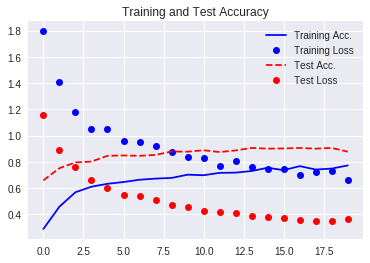

In [86]:
plot_training_history(history)

In [0]:
def predict_new(image_path):
    # Load and resize the image using PIL.
    img = PIL.Image.open(image_path)
    img_resized = img.resize(input_shape, PIL.Image.LANCZOS)

    # Plot the image.
    plt.imshow(img_resized)
    plt.show()

    # Convert the PIL image to a numpy-array with the proper shape.
    img_array = np.expand_dims(np.array(img_resized), axis=0)

    # Use the VGG16 model to make a prediction.
    # This outputs an array with 1000 numbers corresponding to
    # the classes of the ImageNet-dataset.
    pred = new_model.predict(img_array)
    print (pred)
    print (class_names[np.argmax(pred)])
    

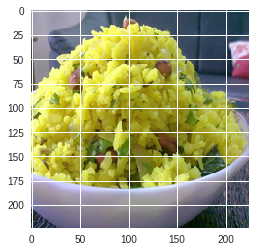

[[0. 1. 0. 0. 0. 0.]]
02_poha


In [102]:
predict_new(image_path='Drive/poha.jpg')


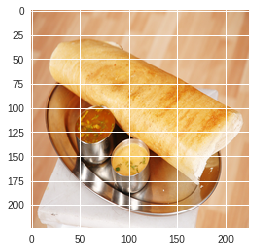

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 2.3217594e-26 0.0000000e+00
  1.0000000e+00]]
06_dosa


In [103]:
predict_new(image_path='Drive/dosa.jpg')


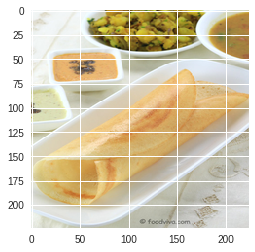

[[4.6497480e-06 1.4005314e-09 2.0055753e-13 9.9797207e-01 9.4785467e-14
  2.0232305e-03]]
04_gulab_jamun


In [104]:
predict_new(image_path='Drive/dosa2.jpg')


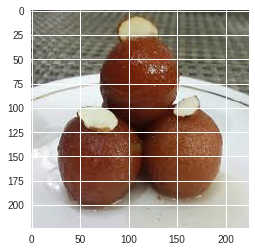

[[0. 0. 0. 1. 0. 0.]]
04_gulab_jamun


In [105]:
predict_new(image_path='Drive/gj.jpeg')


In [0]:
result = new_model.evaluate_generator(generator_test, steps=steps_test)

In [107]:
print("Test-set classification accuracy: {0:.2%}".format(result[1]))

Test-set classification accuracy: 87.72%
